,target,positive,negative,precision,recall,accuracy,TP,TN,FP,FN,roc_auc,fpr,tpr
0,62726.0,0.747941,0.252059,0.980952,0.762963,0.776316,103,15,2,32,0.650051,0.680851,0.980952
1,79260.6,0.649094,0.350906,0.849462,0.782178,0.763158,79,37,14,22,0.738291,0.372881,0.849462
2,95284.5,0.550247,0.449753,0.839506,0.809524,0.809211,68,55,13,16,0.807077,0.225352,0.839506
3,110627.5,0.449753,0.550247,0.764706,0.742857,0.776316,52,66,16,18,0.775210,0.214286,0.764706
4,130000.0,0.339374,0.660626,0.711538,0.616667,0.750000,37,77,15,23,0.740769,0.230000,0.711538
5,150000.0,0.242175,0.757825,0.435897,0.809524,0.828947,17,109,22,4,0.700250,0.035398,0.435897
6,175000.0,0.148270,0.851730,0.086957,0.666667,0.855263,2,128,21,1,0.539602,0.007752,0.086957


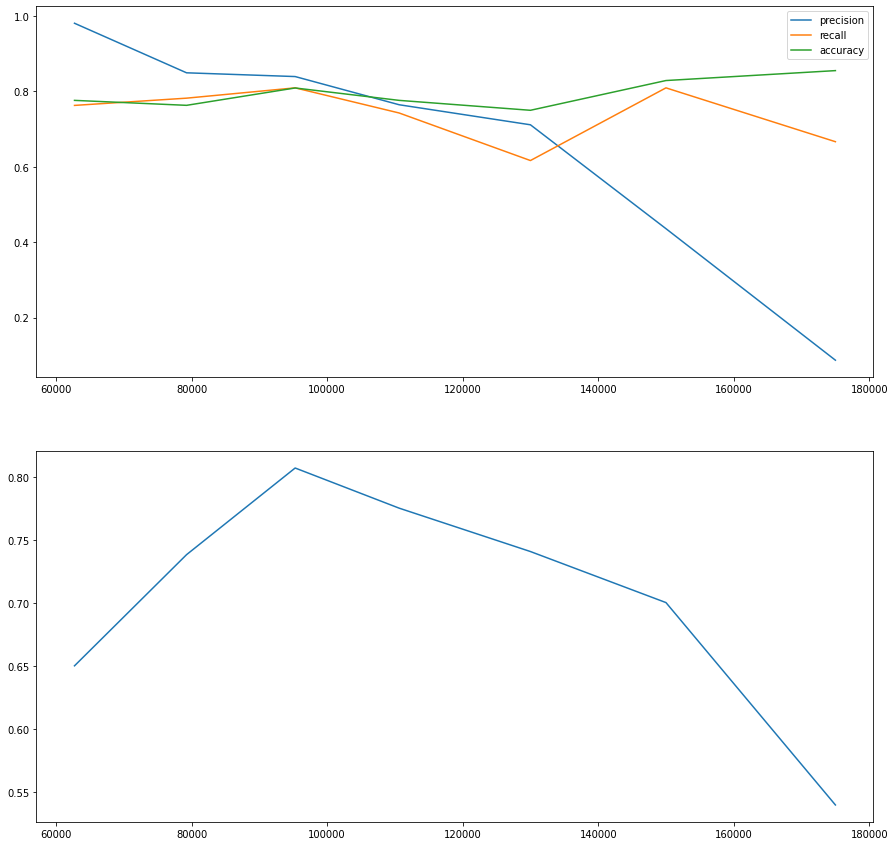

In [2]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from matplotlib import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,roc_curve, auc

df = pd.read_csv(r'C:/Users/berna/Downloads/ds_salaries.csv')
#display(df)
list_target = list(df['salary_in_usd'].quantile([.25,.35,.45,.55,.65,.75,.85]))

#Ver como é a distribuição do salário
def bar_plot(df):    
    plt.figure(figsize=(10,20))
    plt.hist(df['salary_in_usd'])
    plt.show()
    return

def estudo(df,target):
    df['target'] = np.where(df['salary_in_usd'] > target, 1, 0)
    df = df.drop(columns=['Unnamed: 0','salary','salary_currency','salary_in_usd'])
    le = LabelEncoder()
    for i in df.columns:
        df[i] = le.fit_transform(df[i])
    X = df.drop(columns = 'target')
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0 )
    model = LogisticRegression(random_state = 0,max_iter = 1000)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_pred,y_test)
    recall = recall_score(y_pred,y_test)
    accuracy = accuracy_score(y_pred,y_test)
    confusion = confusion_matrix(y_pred,y_test)
    positive = df['target'].value_counts(100)[1]
    negative = df['target'].value_counts(100)[0]
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    return target,precision,recall,accuracy,confusion,positive,negative,roc_auc_lr,fpr_lr,tpr_lr
list_df = {'target':[],'positive':[],'negative':[],'precision':[],'recall':[],'accuracy':[],
           'TP':[],'TN': [],'FP':[],'FN':[],'roc_auc':[],
           'fpr':[],'tpr':[] }
def lista():
    for i in list_target:
        target,precision,recall,accuracy,confusion,positive,negative,roc_auc_lr,fpr_lr,tpr_lr = estudo(df,i)
        TP = confusion[1][1]
        TN = confusion[0][0]
        FN = confusion[1][0]
        FP = confusion[0][1]
        list_df['TP'].append(TP)
        list_df['TN'].append(TN)
        list_df['FP'].append(FP)
        list_df['FN'].append(FN)
        list_df['positive'].append(positive)
        list_df['negative'].append(negative)
        list_df['target'].append(target)
        list_df['precision'].append(precision)
        list_df['recall'].append(recall)
        list_df['accuracy'].append(accuracy)
        list_df['roc_auc'].append(roc_auc_lr)
        list_df['fpr'].append(fpr_lr[1])
        list_df['tpr'].append(tpr_lr[1])
    return list_df
lista()
#print(list_df)
df_result = pd.DataFrame(list_df)
display(df_result)


fig, (ax1,ax2) = plt.subplots(2,figsize=(15, 15))
ax1.plot(list_target,df_result['precision'],label='precision')
ax1.plot(list_target,df_result['recall'],label='recall')
ax1.plot(list_target,df_result['accuracy'],label='accuracy')
ax1.legend()
######AX2
ax2.plot(list_target,df_result['roc_auc'],label='ROC_auc')

plt.show()